## COVID-19 PAKISTAN Data Modeling

### Packages

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import pickle
import math
import scipy.optimize as optim
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
# hide warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

COVID-19 Data Modeling for Pakistan

#### Province wise Data Model

In [2]:
fulltable_pr = pd.read_excel('F:/Data Sets/COVID-19/Pakistan/time series/COVID-19_DATA.xlsx',
                           sheet_name='TimeSeries_KeyIndicators')
fulltable_pr = fulltable_pr.drop(['Discharged'], axis=1).groupby(['Date','Region']).sum().reset_index()
fulltable_pr['Date'] = pd.to_datetime(fulltable_pr['Date'])
fulltable_pr = fulltable_pr.rename(columns={"Cumulative  Test positive": "Confirmed", "Expired": "Deaths"})
fulltable_pr.columns = ['Date', 'Region','Confirmed','Deaths']

## Modeling using Prophet

I am going to use forecasting Model Prophet to shape our model.

In [3]:
def get_time_series_province(province):
    global fulltable_pr
    df = fulltable_pr[(fulltable_pr['Region'] == province)]
    return df.reset_index()

In [4]:
from fbprophet.plot import plot_plotly
import plotly.offline as py

__Build Model__

__Detect Growth: Confirmed Cases__

In [5]:
from fbprophet.plot import add_changepoints_to_plot
def detect_growth_conf(province):  
    if(province == ''):
        df = fulltable_pr[['Region', 'Date', 'Confirmed', 'Deaths']].groupby('Date').sum()
        df_c = df.reset_index()
        data = pd.DataFrame(df_c)
    else:
        df = get_time_series_province(province).drop(['Deaths','Region'],axis=1)
        data = pd.DataFrame(df).drop(['index'],axis=1)
    
    data = data.rename(columns={"Date": "ds", "Confirmed": "y"}) 

    m = Prophet(daily_seasonality=True)
    m.fit(data)
    future = m.make_future_dataframe(periods=15)
    #future #.tail()
    
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    if(province == ''):
        #interactive forecast using plotly
        py.init_notebook_mode()
        fig = plot_plotly(m, forecast, xlabel="Date", ylabel = 'Pakistan Confirmed')  # This returns a plotly Figure
        py.iplot(fig)
        #Plot forecast
        fig1 = m.plot(forecast, xlabel="Date", ylabel = 'Pakistan Confirmed')
        axes = fig1.get_axes()
        axes[0].set_title('Pakistan Confirmed Cases Forecast for next 15 days', size=12)
        # Detecting Trend Change ponits
        a = add_changepoints_to_plot(fig1.gca(), m, forecast)
        #Plot forecast Components
        fig2 = m.plot_components(forecast)
    else:
        #Plot forecast
        fig1 = m.plot(forecast, xlabel="Date", ylabel = province + ' Confirmed')
        axes = fig1.get_axes()
        axes[0].set_title('{} Confirmed Cases Forecast for next 15 days'.format(province), size=12 )
        # Detecting Trend Change ponits.format('Punjab')
        a = add_changepoints_to_plot(fig1.gca(), m, forecast)
        #Plot forecast Components
        fig2 = m.plot_components(forecast)
        

## Pakistan

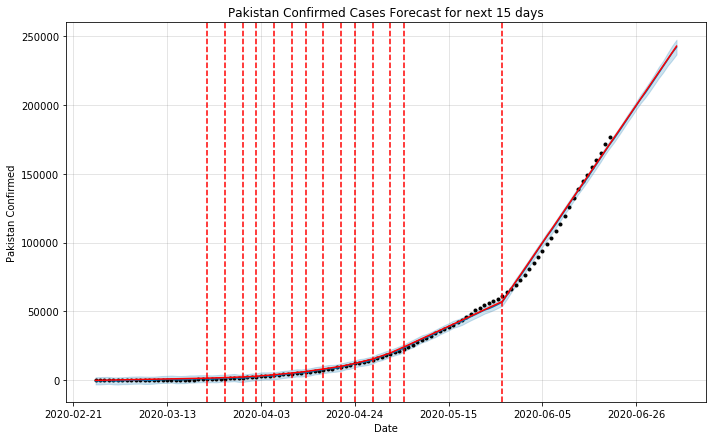

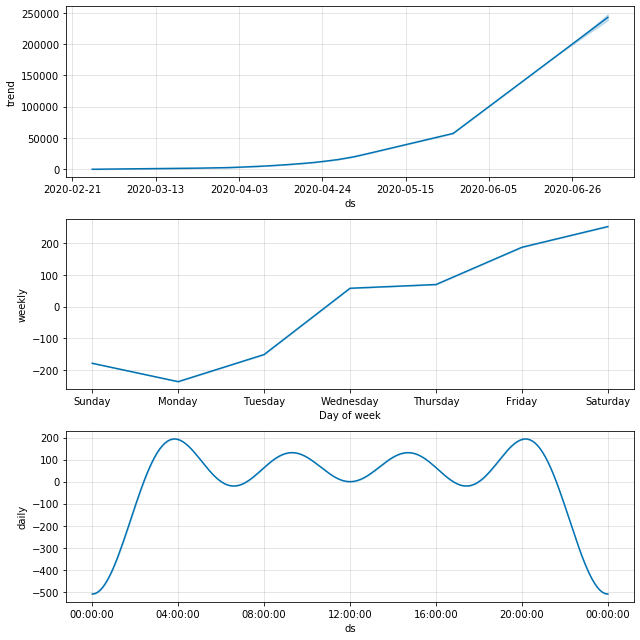

In [6]:
province = ''
detect_growth_conf(province)

__Punjab__

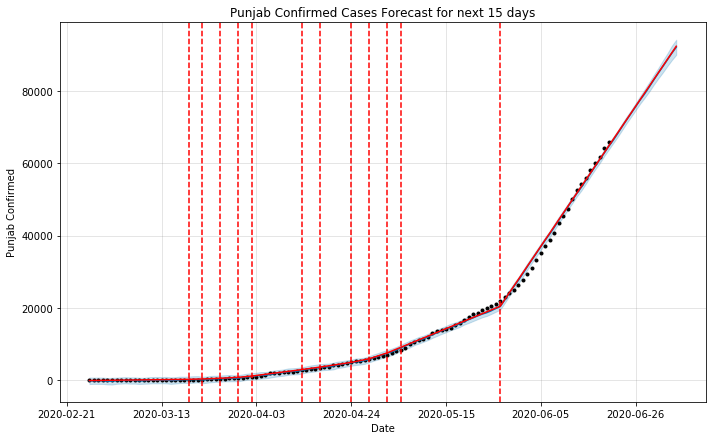

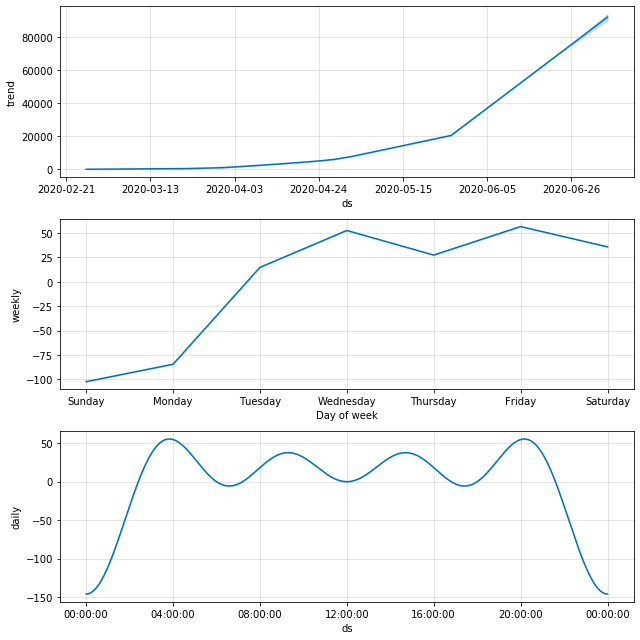

In [7]:
province = 'Punjab'
detect_growth_conf(province)

__Sindh__

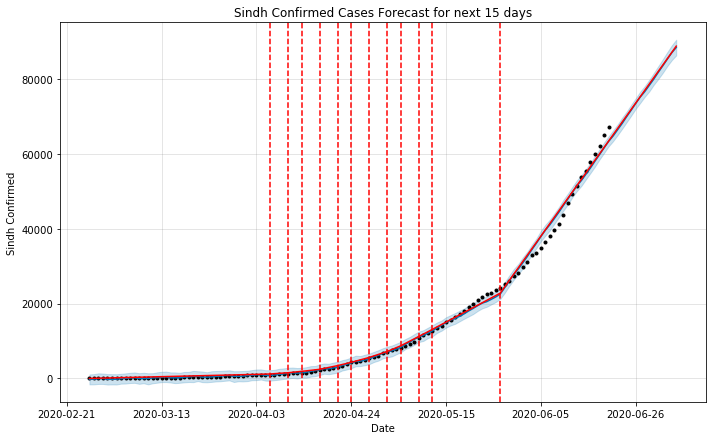

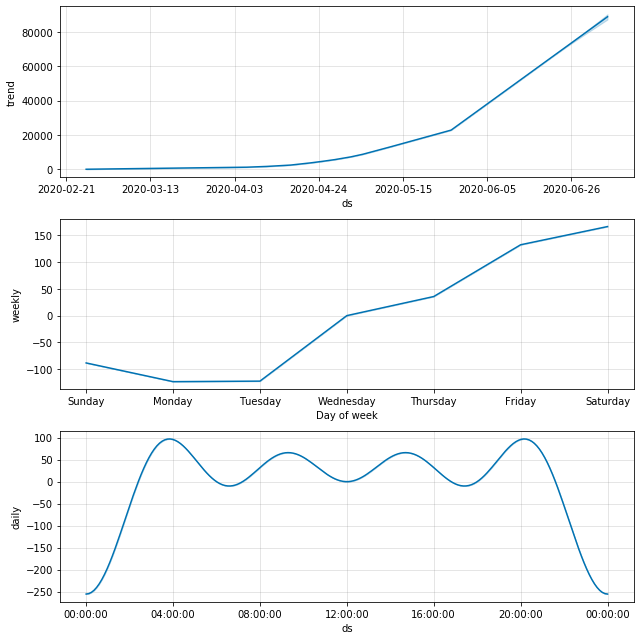

In [8]:
province = 'Sindh'
detect_growth_conf(province)

__ICT__

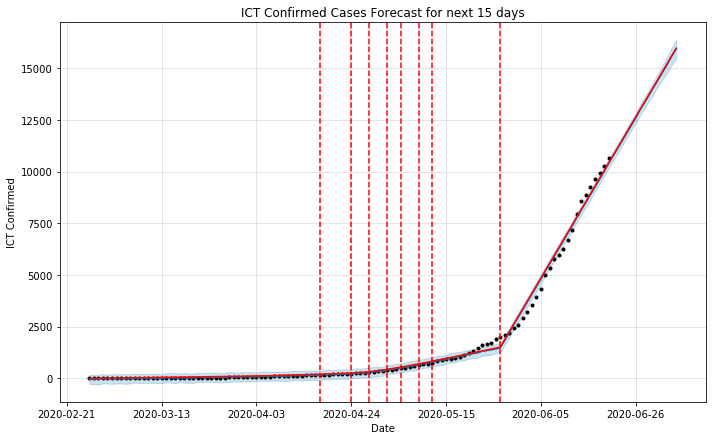

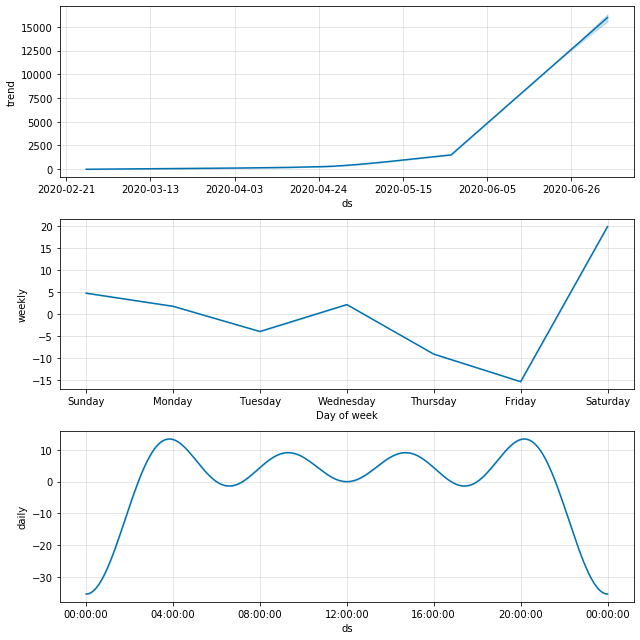

In [9]:
province = 'ICT'
detect_growth_conf(province)

__KP__

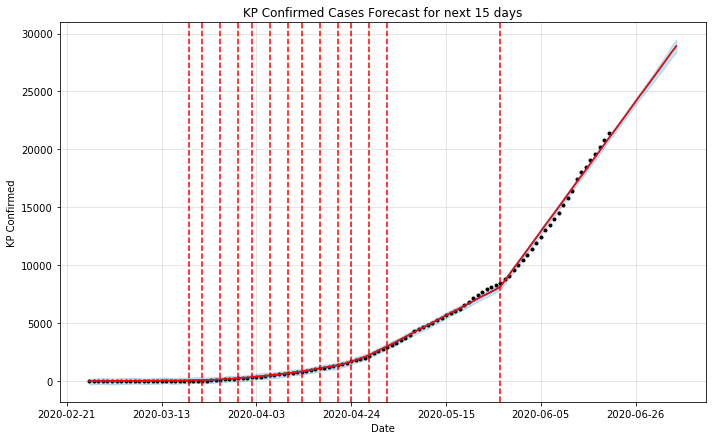

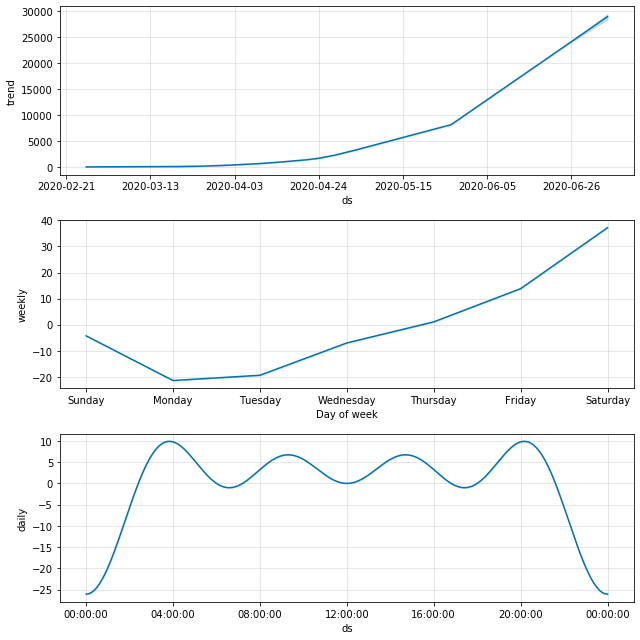

In [10]:
province = 'KP'
detect_growth_conf(province)

__GB__

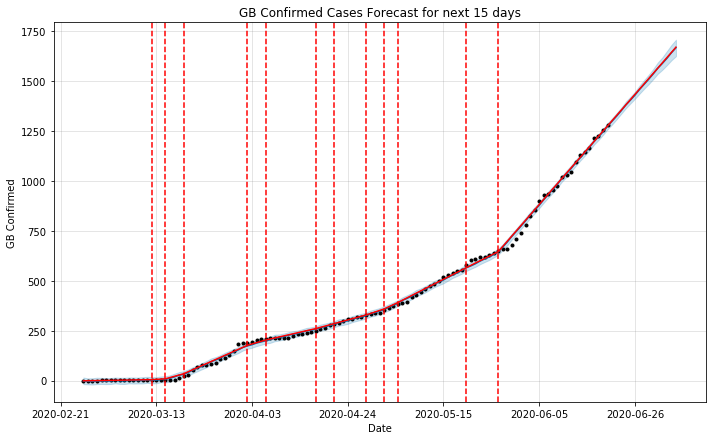

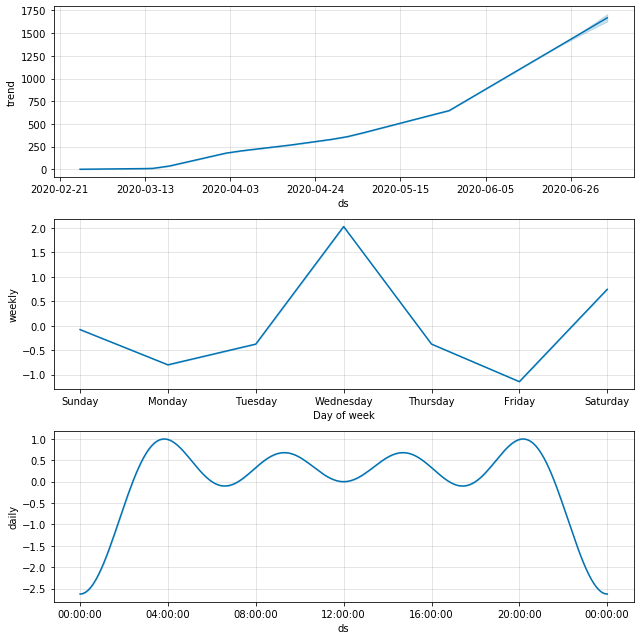

In [11]:
province = 'GB'
detect_growth_conf(province)

__Balochistan__

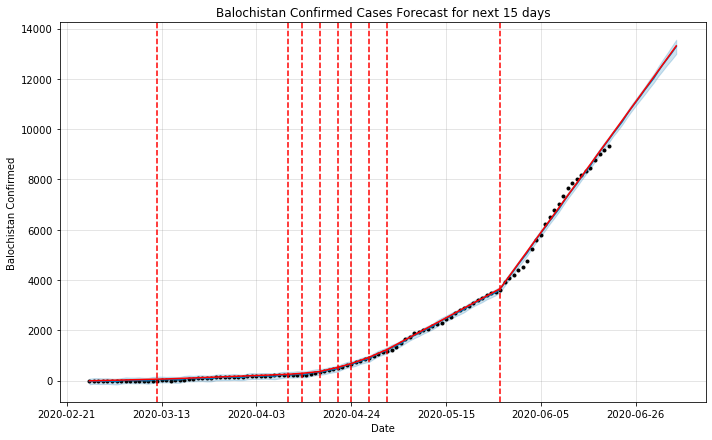

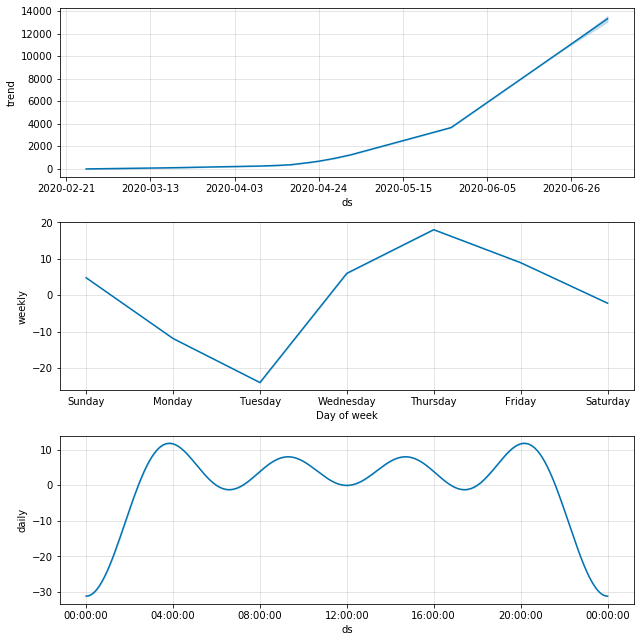

In [12]:
province = 'Balochistan'
detect_growth_conf(province)

__AJK__

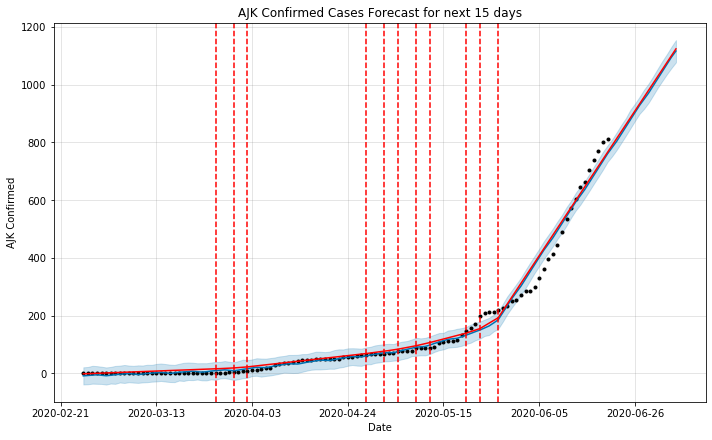

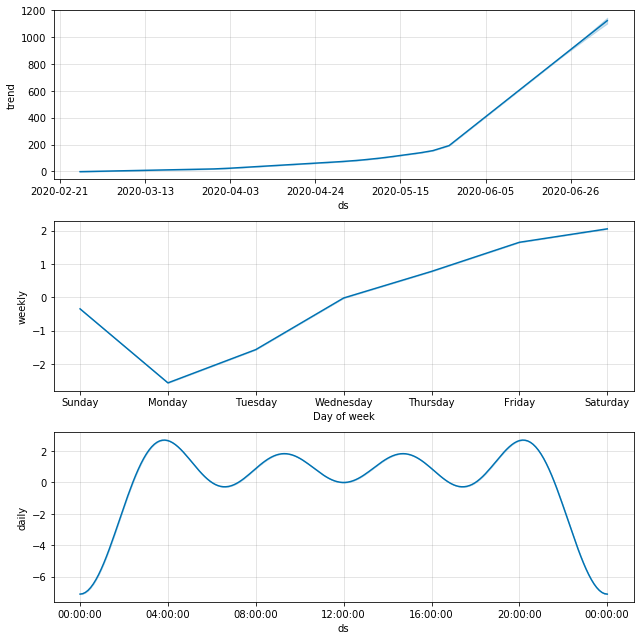

In [13]:
province = 'AJK'
detect_growth_conf(province)

__Detect Growth: Expired Cases__

In [14]:
from fbprophet.plot import add_changepoints_to_plot
def detect_growth_exp(province):  
    if(province == ''):
        df = fulltable_pr[['Region', 'Date', 'Confirmed', 'Deaths']].groupby('Date').sum()
        df_c = df.reset_index()
        data = pd.DataFrame(df_c)
    else:
        df = get_time_series_province(province).drop(['Confirmed','Region'],axis=1)
        data = pd.DataFrame(df).drop(['index'],axis=1)
    
    data = data.rename(columns={"Date": "ds", "Deaths": "y"}) 

    m = Prophet(daily_seasonality=True)
    m.fit(data)
    future = m.make_future_dataframe(periods=15)
    #future #.tail()
    
    forecast = m.predict(future)
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    
    if(province == ''):
        #interactive forecast using plotly
        py.init_notebook_mode()
        fig = plot_plotly(m, forecast, xlabel="Date", ylabel = 'Pakistan Fatalities')  # This returns a plotly Figure
        py.iplot(fig)
        #Plot forecast
        fig1 = m.plot(forecast, xlabel="Date", ylabel = 'Pakistan Fatalities')
        axes = fig1.get_axes()
        axes[0].set_title('Pakistan Fatalities Forecast for next 15 days', size=12)
        
        # Detecting Trend Change ponits
        a = add_changepoints_to_plot(fig1.gca(), m, forecast)
        #Plot forecast Components
        fig2 = m.plot_components(forecast)
    else:
        #Plot forecast
        fig1 = m.plot(forecast, xlabel="Date", ylabel = province + ' Fatalities')
        axes = fig1.get_axes()
        axes[0].set_title('{} Fatalities Forecast for next 15 days'.format(province), size=12 )
        # Detecting Trend Change ponits
        a = add_changepoints_to_plot(fig1.gca(), m, forecast)
        #Plot forecast Components
        fig2 = m.plot_components(forecast)
        

## Pakistan

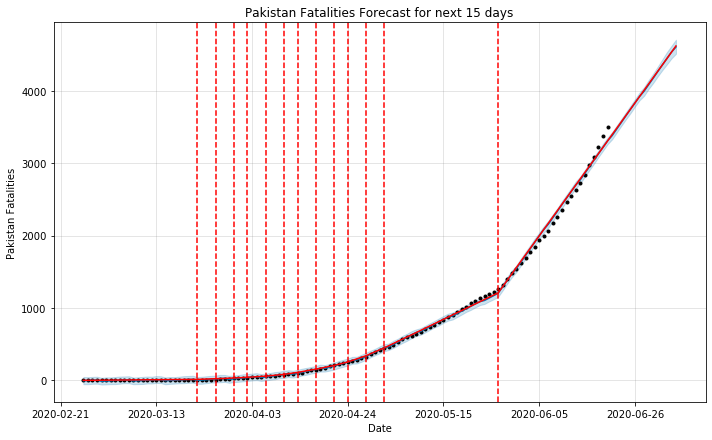

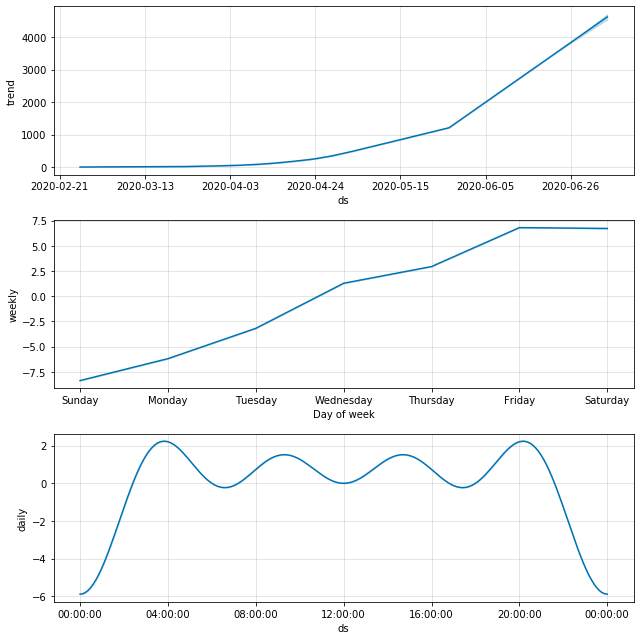

In [15]:
province=''
detect_growth_exp(province)

__Punjab__

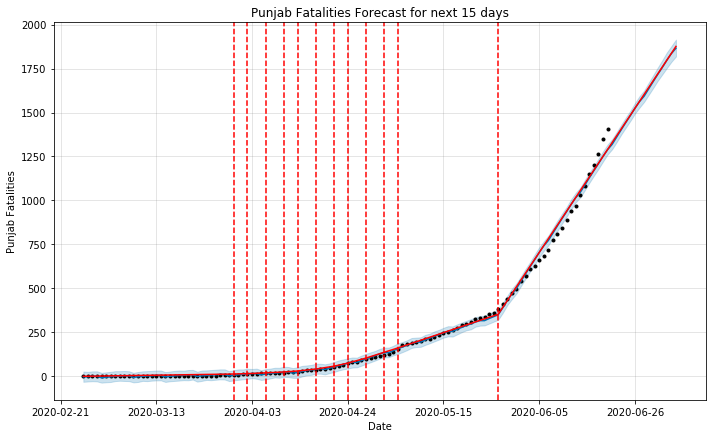

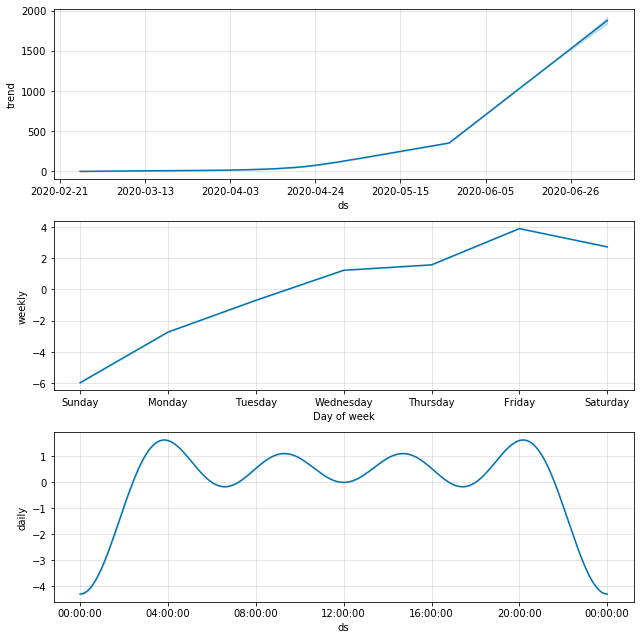

In [16]:
province='Punjab'
detect_growth_exp(province)

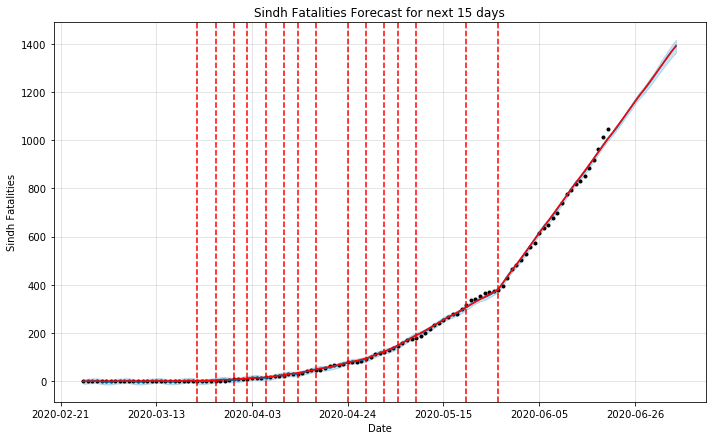

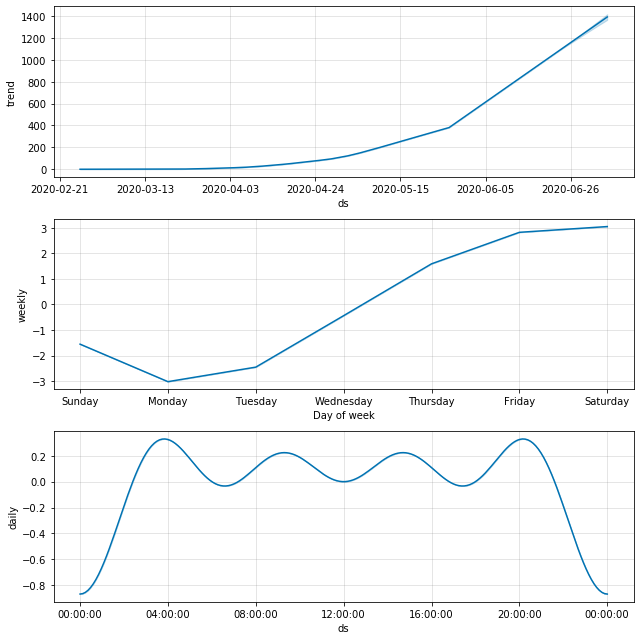

In [17]:
province='Sindh'
detect_growth_exp(province)

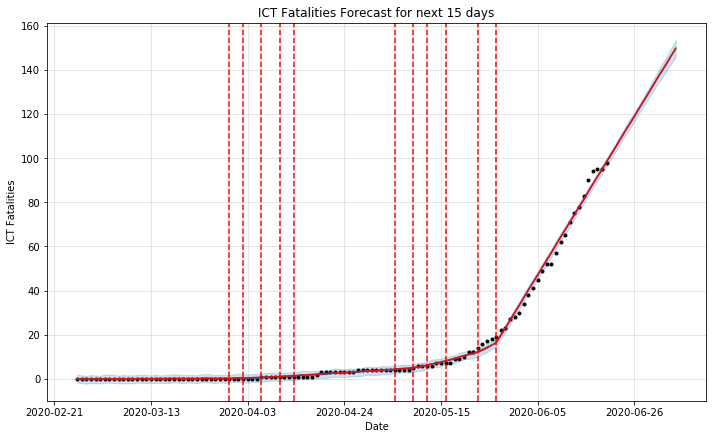

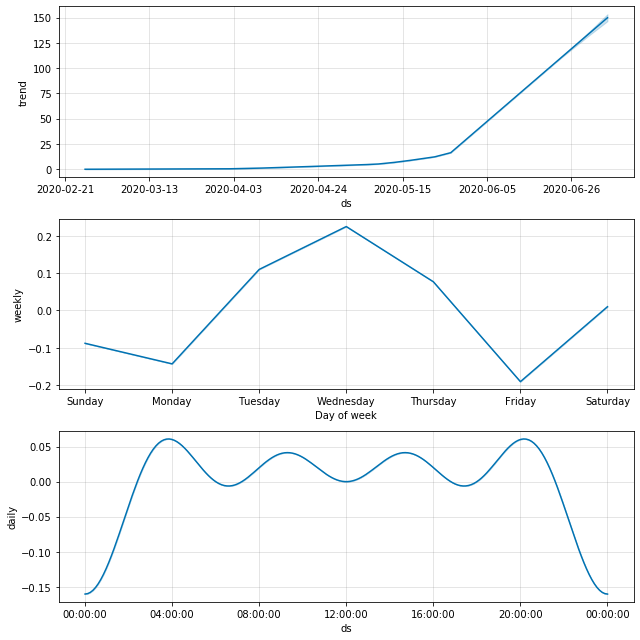

In [18]:
province='ICT'
detect_growth_exp(province)

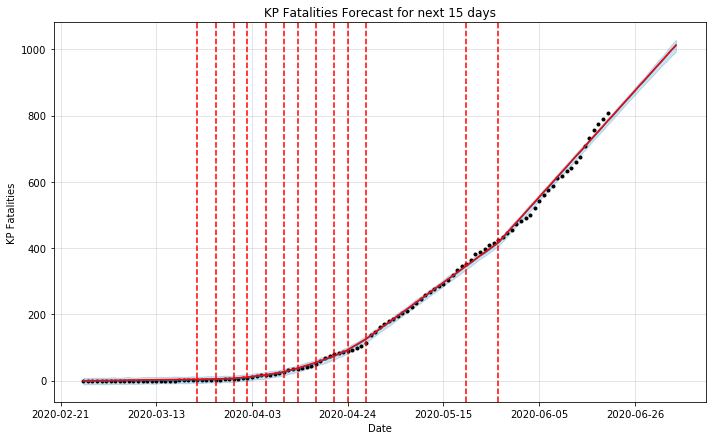

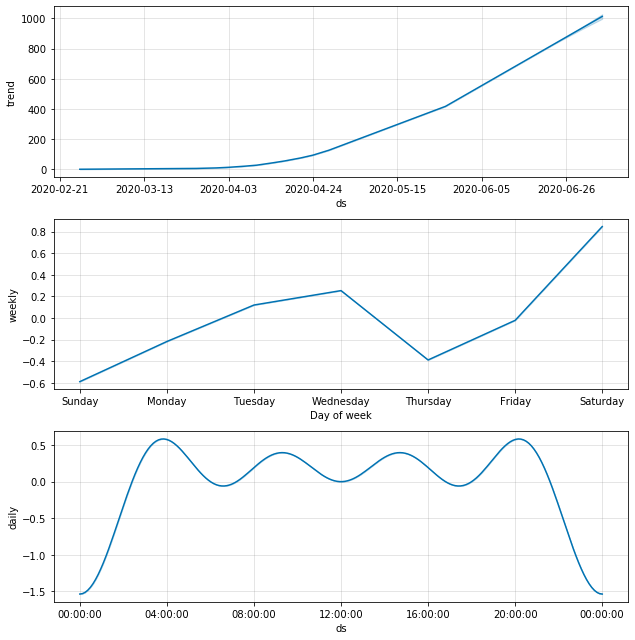

In [19]:
province='KP'
detect_growth_exp(province)

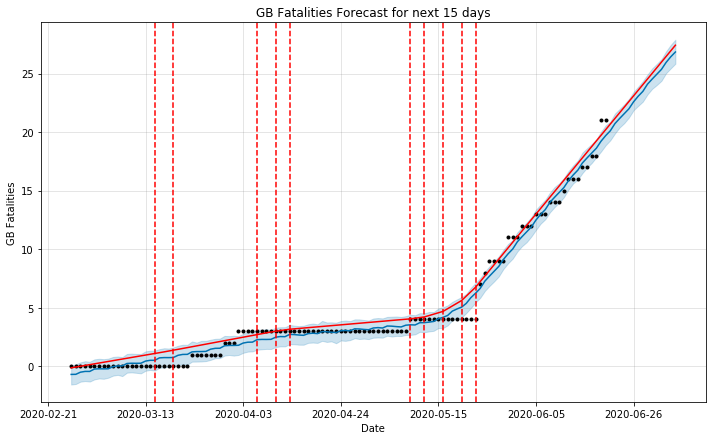

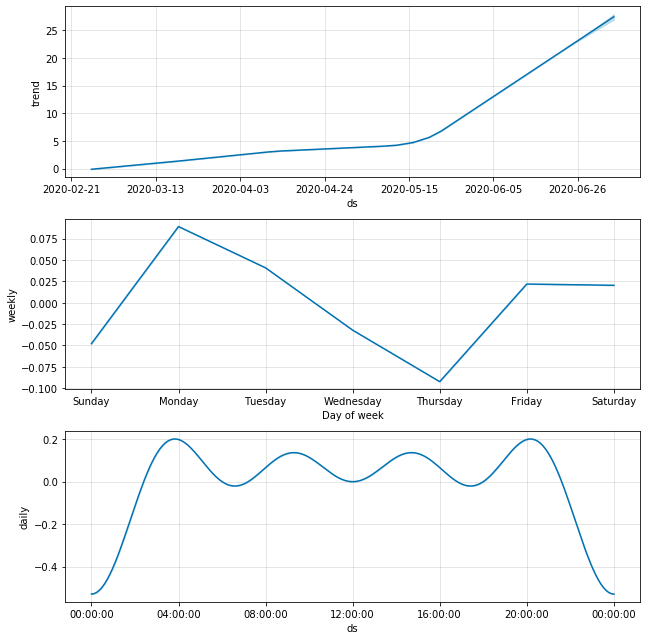

In [20]:
province='GB'
detect_growth_exp(province)

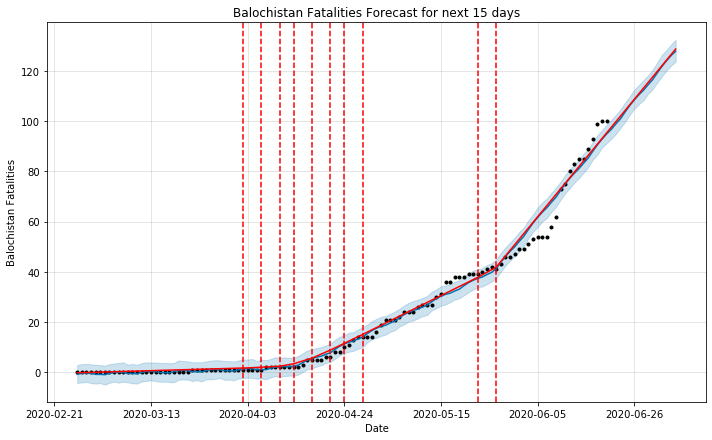

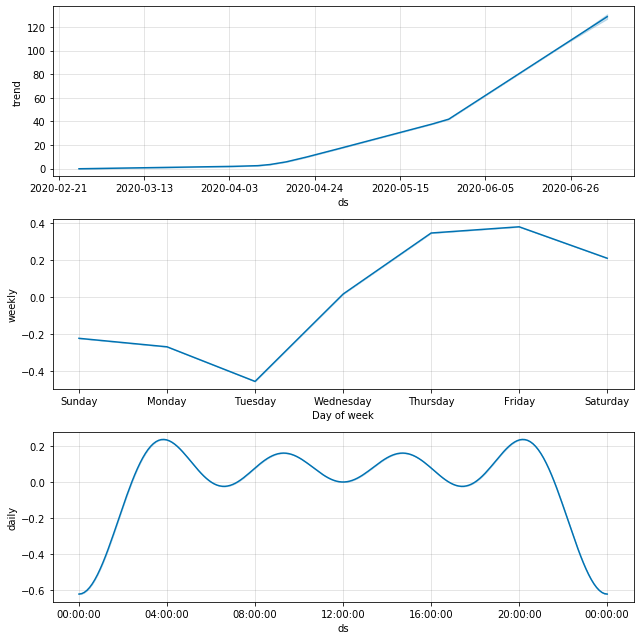

In [21]:
province='Balochistan'
detect_growth_exp(province)

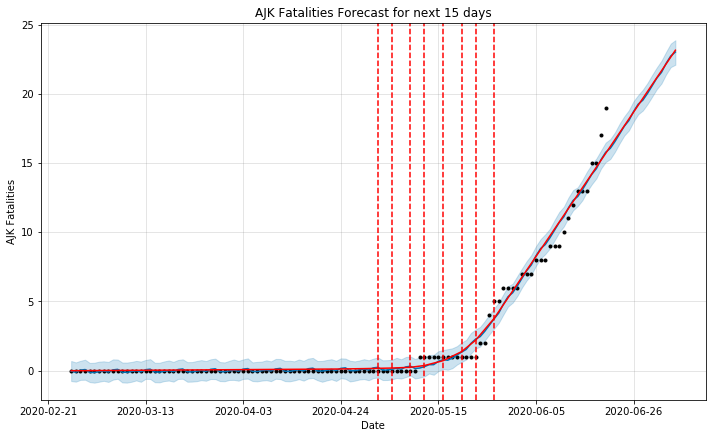

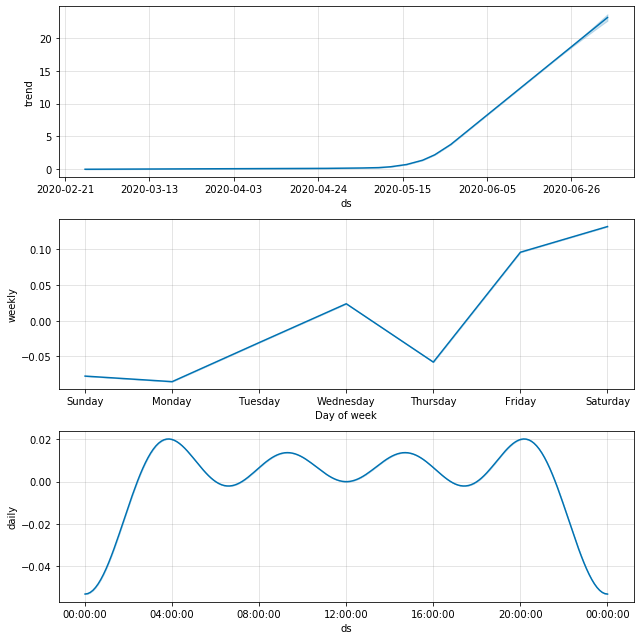

In [22]:
province='AJK'
detect_growth_exp(province)